## Necessary Imports

In [827]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.signal import find_peaks
from datetime import datetime, timedelta
import plotly.express as px
from scipy import stats

## Read and Prepare the CSV

In [828]:
df = pd.read_csv("../Data/SQL_LHF.csv", index_col='MarketTradeDate')
df.index = pd.to_datetime(df.index)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.replace(-1000000000, np.nan, inplace=True)
df = df.iloc[::-1]
df = df[df.index > '1981-12-31']
df = df[df.index < '2024-01-01']
df.head()

,OpenPx,HighPx,LowPx,SettlementPx,Volume,OpenInterest
MarketTradeDate,,,,,,
1982-01-04,47.55,47.85,46.85,47.25,422.0,1291.0
1982-01-05,46.92,47.55,46.65,47.27,287.0,1410.0
1982-01-06,47.32,48.20,47.27,48.12,318.0,1397.0
1982-01-07,48.27,48.30,47.62,47.85,230.0,1437.0
1982-01-08,47.70,48.65,47.45,48.55,284.0,1488.0


In [829]:
yahoo_df = pd.read_csv("../Data/YH_LHF.csv", index_col='Date')
yahoo_df.index = pd.to_datetime(yahoo_df.index)
yahoo_df = yahoo_df.loc[:, ~yahoo_df.columns.str.contains('^Unnamed')]
yahoo_df = yahoo_df.iloc[::-1]
df = df[df.index < '2024-01-01']

yahoo_df = yahoo_df.interpolate()  # Interpolates missing values linearly
yahoo_df = yahoo_df.dropna()       # Drops any remaining NA values

yahoo_df.head()

C:\Users\ldolvin\AppData\Local\Temp\ipykernel_59460\74760968.py:7: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-03-04,59.70,59.88,59.6,59.65,59.65,-
2002-03-05,59.15,59.15,58.7,58.80,58.80,-
2002-03-06,58.50,58.80,57.7,57.70,57.70,-
2002-03-07,58.20,58.60,58.0,58.40,58.40,-
2002-03-08,58.25,58.25,57.9,58.05,58.05,-


## EDA

In [830]:
print(df['OpenPx'].isna().sum(), df['HighPx'].isna().sum(), df['LowPx'].isna().sum(), df['SettlementPx'].isna().sum(), df['Volume'].isna().sum(), df['OpenInterest'].isna().sum())

126 41 39 0 21 4


In [831]:
# Creating an interactive plot
fig = go.Figure(data=[go.Scatter(x=df.index, y=df['SettlementPx'], mode='lines')])

# Update layout for a better visual appearance
fig.update_layout(
    title='Settlement (Close) Price Over Time',
    xaxis_title='Date',
    yaxis_title='Settlement Price',
    hovermode='closest'  # Show closest data point on hover
)

# Show the figure
fig.show()

In [832]:
temp_df = pd.merge(yahoo_df, df, how='left', left_on='Date', right_index=True)
temp_df.head()

,Open,High,Low,Close,Adj Close,Volume_x,OpenPx,HighPx,LowPx,SettlementPx,Volume_y,OpenInterest
Date,,,,,,,,,,,,
2002-03-04,59.70,59.88,59.6,59.65,59.65,-,63.05,63.250,63.00,63.225,158.0,2319.0
2002-03-05,59.15,59.15,58.7,58.80,58.80,-,63.10,63.100,62.60,63.075,495.0,2100.0
2002-03-06,58.50,58.80,57.7,57.70,57.70,-,62.95,63.000,62.10,62.700,328.0,1965.0
2002-03-07,58.20,58.60,58.0,58.40,58.40,-,62.75,63.725,62.75,63.700,303.0,2099.0
2002-03-08,58.25,58.25,57.9,58.05,58.05,-,63.50,63.800,63.30,63.750,175.0,2147.0


In [833]:
# Creating an interactive plot
fig = px.line(temp_df, x=temp_df.index, y=['Adj Close', 'SettlementPx'])

# Update layout for a better visual appearance
fig.update_layout(
    title='YH vs SQL Close Price Over Time',
    xaxis_title='Date',
    yaxis_title='Closes',
    hovermode='closest'  # Show closest data point on hover
)

# Show the figure
fig.show()

del temp_df

## Additive Model of Time Series Decomposition

Peak Dates:
1982-03-17
1983-03-15
1984-03-14
1985-03-13
1986-03-12
1987-03-11
1988-03-09
1989-03-10
1990-03-09
1991-03-08
1992-03-06
1993-03-08
1994-03-04
1995-03-06
1996-03-04
1997-03-04
1998-03-04
1999-03-04
2000-03-03
2001-03-05
2002-03-07
2003-03-10
2004-03-09
2005-03-10
2006-03-10
2007-03-13
2008-03-12
2009-03-12
2010-03-12
2011-03-11
2012-03-12
2013-03-12
2014-03-12
2015-03-12
2016-03-11
2017-03-13
2018-03-13
2019-03-13
2020-03-12
2021-03-12
2022-03-11
2023-03-14

Trough Dates:
1982-08-24
1983-08-22
1984-08-21
1985-08-20
1986-08-19
1987-08-18
1988-08-18
1989-08-17
1990-08-16
1991-08-15
1992-08-13
1993-08-13
1994-08-12
1995-08-11
1996-08-09
1997-08-11
1998-08-11
1999-08-11
2000-08-10
2001-08-10
2002-08-14
2003-08-15
2004-08-17
2005-08-17
2006-08-17
2007-08-20
2008-08-19
2009-08-19
2010-08-19
2011-08-18
2012-08-17
2013-08-19
2014-08-19
2015-08-19
2016-08-18
2017-08-18
2018-08-20
2019-08-20
2020-08-19
2021-08-19
2022-08-19
2023-08-22


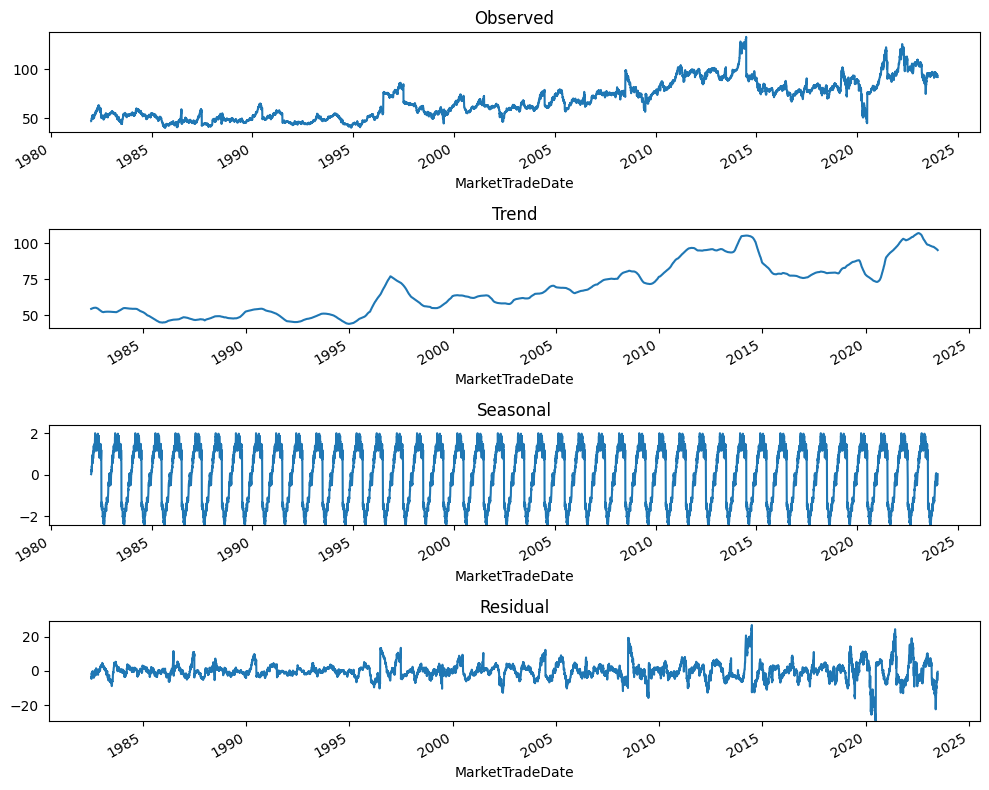

In [834]:
result = seasonal_decompose(df['SettlementPx'], model='additive', period=252)

# Extract the seasonal component
seasonal = result.seasonal

# Initialize lists to store peak and trough dates
peak_dates = []
trough_dates = []

# Loop through each year in the data
for year in range(seasonal.index.year.min(), seasonal.index.year.max() + 1):
    # Extract the seasonal component for the current year
    yearly_seasonal = seasonal[seasonal.index.year == year]
    
    # Find peaks (local maxima) within the current year
    peaks, _ = find_peaks(yearly_seasonal)
    if peaks.size > 0:
        peak_date = yearly_seasonal.index[peaks[np.argmax(yearly_seasonal.iloc[peaks])]]
        peak_dates.append(peak_date)
    
    # Find troughs (local minima) within the current year
    troughs, _ = find_peaks(-yearly_seasonal)
    if troughs.size > 0:
        trough_date = yearly_seasonal.index[troughs[np.argmin(yearly_seasonal.iloc[troughs])]]
        trough_dates.append(trough_date)

# Print the dates
print("Peak Dates:")
for date in peak_dates:
    print(date.strftime('%Y-%m-%d'))

print("\nTrough Dates:")
for date in trough_dates:
    print(date.strftime('%Y-%m-%d'))
# Plotting with adjustments
fig, axes = plt.subplots(4, 1, figsize=(10, 8))

result.observed.plot(ax=axes[0], title='Observed')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonal')
result.resid.plot(ax=axes[3], title='Residual')

# Dynamic y-axis limits based on actual data ranges
seasonal_limit = max(abs(result.seasonal.min()), abs(result.seasonal.max()))
resid_limit = max(abs(result.resid.min()), abs(result.resid.max()))

# Adjusting the y-axis scale for seasonal and residual if necessary
axes[2].set_ylim(-seasonal_limit, seasonal_limit)  # Adjust to fit the seasonal data
axes[3].set_ylim(-resid_limit, resid_limit)  # Adjust to fit the residual data

plt.tight_layout()
plt.show()

In [835]:
# Extract the seasonal component
seasonal = result.seasonal

# Initialize lists to store peak and trough dates
peak_dates = []
trough_dates = []

# Loop through each year in the data
for year in range(seasonal.index.year.min(), seasonal.index.year.max() + 1):
    # Extract the seasonal component for the current year
    yearly_seasonal = seasonal[seasonal.index.year == year]
    
    # Find peaks (local maxima) within the current year
    peaks, _ = find_peaks(yearly_seasonal)
    if peaks.size > 0:
        peak_date = yearly_seasonal.index[peaks[np.argmax(yearly_seasonal.iloc[peaks])]]
        peak_dates.append(peak_date)
    
    # Find troughs (local minima) within the current year
    troughs, _ = find_peaks(-yearly_seasonal)
    if troughs.size > 0:
        trough_date = yearly_seasonal.index[troughs[np.argmin(yearly_seasonal.iloc[troughs])]]
        trough_dates.append(trough_date)

# Convert dates to day of year
peak_days = [date.timetuple().tm_yday for date in peak_dates]
trough_days = [date.timetuple().tm_yday for date in trough_dates]

# Calculate average day of year
avg_peak_day = int(np.mean(peak_days))
avg_trough_day = int(np.mean(trough_days))

# Convert average day of year back to a date (choosing a non-leap year for consistency)
reference_year = 2000  # Non-leap year to avoid complications with Feb 29
avg_peak_date = datetime(reference_year, 1, 1) + timedelta(days=avg_peak_day - 1)
avg_trough_date = datetime(reference_year, 1, 1) + timedelta(days=avg_trough_day - 1)

# Print the average dates
print("Average Peak Date:", avg_peak_date.strftime('%Y-%m-%d'))
print("Average Trough Date:", avg_trough_date.strftime('%Y-%m-%d'))

Average Peak Date: 2000-03-09
Average Trough Date: 2000-08-16


## Backtest the Strategy

In [836]:
def backtest(df, buy, sell):
    df['pct_change'] = df['SettlementPx'].pct_change()
    df = df.iloc[1:, :]
    return_list =[]
    date_list = []

    for i, row in df.iterrows():
        # Extract the month and day from the index
        temp = datetime(year=1904, month=i.month, day=i.day)
        # Check if the date is between the start and end dates
        if sell <= temp < buy:
            return_list.append(-1*row['pct_change'])
            date_list.append(i)
        else:
            return_list.append(row['pct_change'])
            date_list.append(i)
    
    return_df = pd.DataFrame({'date': date_list, 'return': return_list}, columns=['date', 'return'])
    return_df.set_index('date')
 
    return return_df

In [837]:
sell = datetime(year=1904, month=avg_peak_date.month, day=avg_peak_date.day)
buy = datetime(year=1904, month=avg_trough_date.month, day=avg_trough_date.day)
return_df = backtest(df, buy, sell)
return_df.head()

,date,return
0,1982-01-05,0.000423
1,1982-01-06,0.017982
2,1982-01-07,-0.005611
3,1982-01-08,0.014629
4,1982-01-11,0.005561


In [838]:
total_return = 1
for i, row in return_df.iterrows():
    total_return *= (1 + row['return'])
total_return = (total_return - 1)
print(f"Total Return: {'%.2f' % (total_return*100)}%")

Total Return: 13.48%, Std Dev: 0.0161, Sharpe: 838.78


In [839]:
yearly_avg = ((total_return + 1)**(1/42))-1
print(f"Annual Return: {'%.2f' % (yearly_avg*100)}%")

Annual Return: 6.57%


#### Year By Year Analysis

In [840]:
return_df.set_index('date', inplace=True)
annual_data = return_df.groupby(pd.Grouper(freq='YE'))
annual_returns = annual_data['return'].apply(lambda x: (1 + x).prod() - 1)
annual_std_dev = annual_data['return'].std()
annual_sharpe = (annual_returns - 0.01616) / annual_std_dev
annual_summary = pd.DataFrame({'Annual Returns': annual_returns, 'Annual Std Dev': annual_std_dev, 'Annual Sharpe': annual_sharpe})

total_return = (1 + annual_summary['Annual Returns']).prod()
print(f"Total Return: {'%.2f' % ((total_return-1)*100)}%")
print()

print(f"Average Return: {'%.2f' % ((stats.gmean(annual_summary['Annual Returns'] + 1)-1)*100)}%, Average Std Dev: {'%.4f' % annual_summary['Annual Std Dev'].mean()}, Average Sharpe: {'%.2f' % annual_summary['Annual Sharpe'].mean()}")
print()

annual_summary.head(45)

Total Return: 1348.09%

Average Return: 6.57%, Average Std Dev: 0.0146, Average Sharpe: 7.69



,Annual Returns,Annual Std Dev,Annual Sharpe
date,,,
1982-12-31,0.319199,0.014907,20.328864
1983-12-31,-0.034240,0.010597,-4.755909
1984-12-31,0.096973,0.009054,8.926035
1985-12-31,0.317649,0.010239,29.444651
1986-12-31,-0.207900,0.019689,-11.379875
1987-12-31,-0.047561,0.018883,-3.374463
1988-12-31,0.035548,0.016746,1.157732
1989-12-31,0.127631,0.007851,14.197995
1990-12-31,0.321599,0.014464,21.117248
